In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from sklearn.datasets import make_swiss_roll

%matplotlib notebook

#### Experiment 1: Three-dimensional "vortex" data
Generate a Swiss roll data set and then put it into a 3d cube of noise.

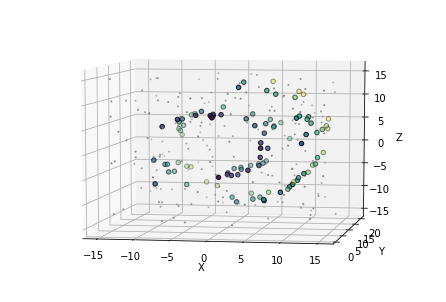

In [2]:
n_manifold = 100
n_space = 200

# Generate some data from a Swiss roll manifold
Z, _ = make_swiss_roll(n_manifold, noise=0.15)
Zval = np.sum(np.abs(Z), axis=1)
Zval = Zval / np.max(Zval)

# Generate some background noise
xMin, xMax, yMin, yMax, zMin, zMax = -15, 15, 0, 20, -15, 15
U = np.c_[np.random.uniform(xMin, xMax, size=(n_space, )), 
          np.random.uniform(yMin, yMax, size=(n_space, )), 
          np.random.uniform(zMin, zMax, size=(n_space, ))]
Uval = np.full((n_space, ), fill_value=0.5)

# Stack the lot
X = np.r_[Z, U]
V = np.r_[Zval, Uval]

# Plot the data set
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], s=20, c=Zval, cmap='viridis', edgecolors='k')
ax.scatter(U[:, 0], U[:, 1], U[:, 2], s=1, c='gray')
ax.set_xlabel('X');
ax.set_ylabel('Y');
ax.set_zlabel('Z');

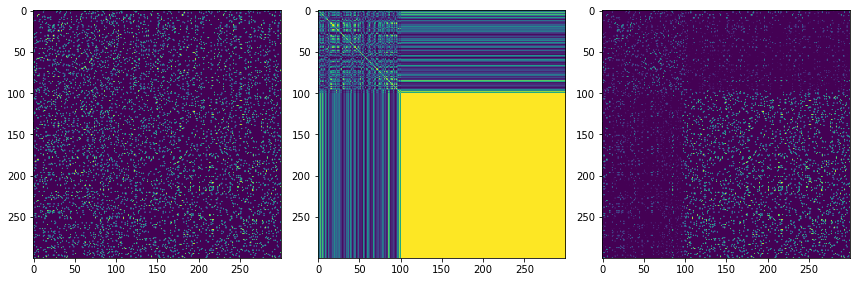

In [13]:
from sklearn.neighbors import NearestNeighbors, kneighbors_graph
from sklearn.metrics import pairwise_distances

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Identify spatial neighbors for each point
n_neighbors = 20
A = kneighbors_graph(X, n_neighbors=n_neighbors)
A = A.toarray()
ax[0].imshow(A)

# Identify semantic neighbors for each point
gamma = 10.0
D = np.exp(-gamma * pairwise_distances(V.reshape(-1, 1)))
ax[1].imshow(D)

# Identify combined semantic and spatial neighbors
P = A * D
ax[2].imshow(P)

fig.tight_layout()

In [15]:
np.min(P)

0.0